# Bias-Variance Tradeoff: Removing Underfitting and Overfitting

This notebook demonstrates how to adjust regression models to reduce underfitting and overfitting.
We use polynomial regression with Ridge regularization to balance bias and variance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


In [3]:
# Dados simulados
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.normal(scale=2, size=X.shape[0])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
# Underfitting: Linear Regression
underfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
underfit_model.fit(X_train, y_train)

# Overfitting: Polynomial Regression (degree=10)
overfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
overfit_model.fit(X_train, y_train)

# Regularization: Polynomial + Ridge
reg_model = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10))
])
reg_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",10
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


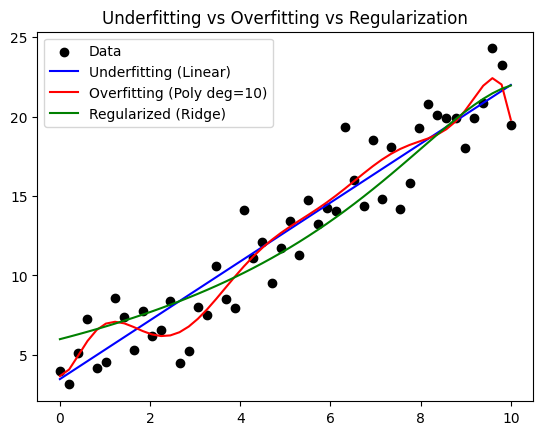

In [5]:
plt.scatter(X, y, color="black", label="Data")

# Predictions
plt.plot(X, underfit_model.predict(X), label="Underfitting (Linear)", color="blue")
plt.plot(X, overfit_model.predict(X), label="Overfitting (Poly deg=10)", color="red")
plt.plot(X, reg_model.predict(X), label="Regularized (Ridge)", color="green")

plt.legend()
plt.title("Underfitting vs Overfitting vs Regularization")
plt.show()


In [6]:
print("Underfitting MSE:", mean_squared_error(y_test, underfit_model.predict(X_test)))
print("Overfitting MSE:", mean_squared_error(y_test, overfit_model.predict(X_test)))
print("Regularized MSE:", mean_squared_error(y_test, reg_model.predict(X_test)))


Underfitting MSE: 3.3831350069632737
Overfitting MSE: 3.553809180538027
Regularized MSE: 3.4399319507814123


## Conclusion
- **Underfitting**: The model is too simple and fails to capture the data trend.
- **Overfitting**: The model is too complex and fits noise, losing generalization.
- **Regularization**: Ridge regression balances complexity, reducing variance and improving generalization.
